# Logistische Regression für Herzerkrankung

### Bibliotheken laden

In [887]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Daten Laden

In [888]:
df = pd.read_csv("../data/Heart_attack/heart.csv")

### Daten Qualität

In [889]:
# Anzahl der Werte gleich Null
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [890]:
# Anzahl Werte ist NaN
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Daten kennenlernen und verstehen

In [891]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Spalten Namen

In [892]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

Verteilung des Alters und des Geschlechts

In [917]:
selected_columns = ["age","sex"]
for attribut in selected_columns: 
    fig = px.histogram(df, x=attribut, title=f"Histogramm von {attribut}", color='output', opacity=0.8, barmode='overlay')
    fig.show()

### Nach output gruppiert

In [894]:
df_output_gr = df.groupby(by='output')
df_output_gr.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [899]:
df_output_gr["sex"].count()

output
0    138
1    165
Name: sex, dtype: int64

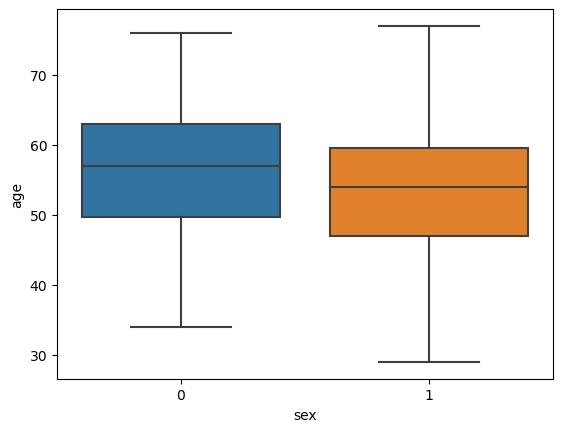

In [902]:
sns.boxplot(x='sex', y='age', data=df)
fig.show()

Korrelationen der Attribute

<Axes: >

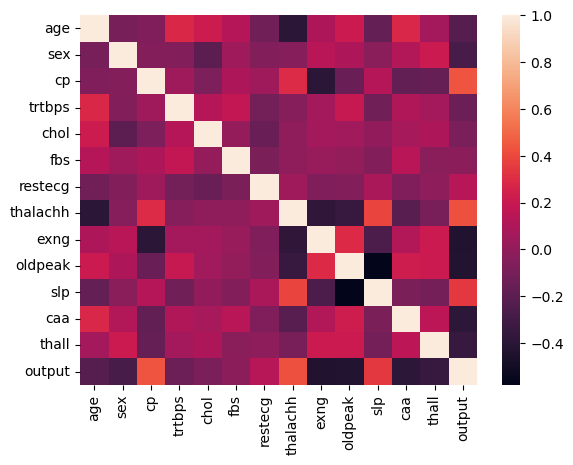

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)

Outlier identifizieren

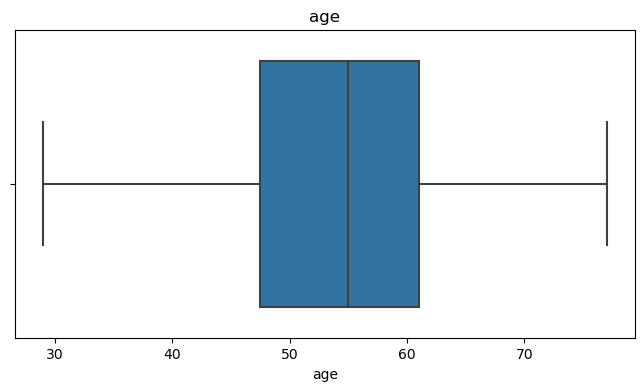

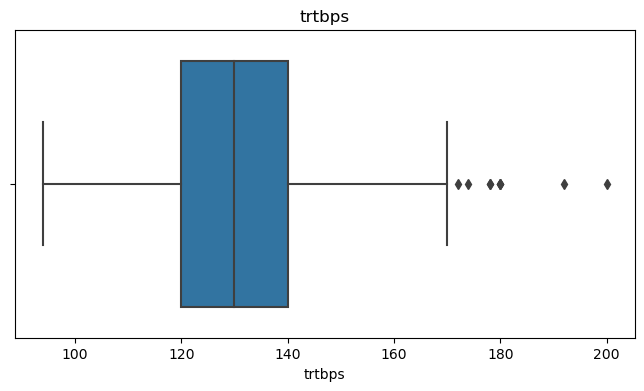

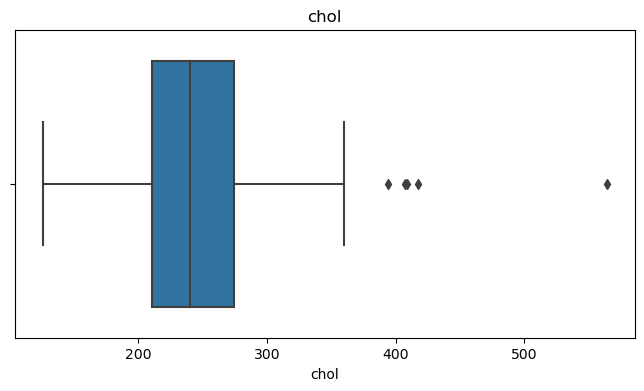

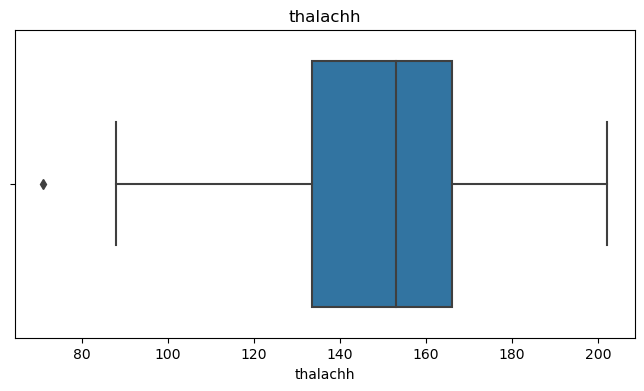

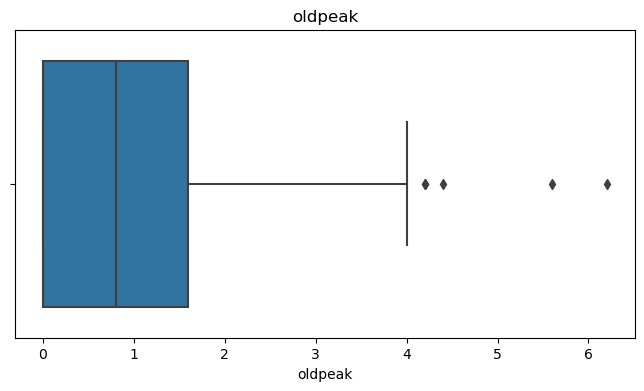

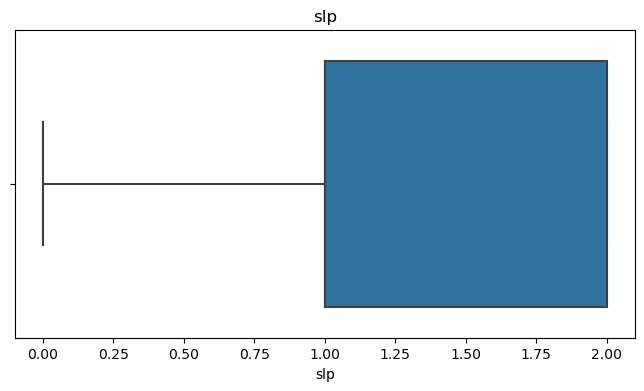

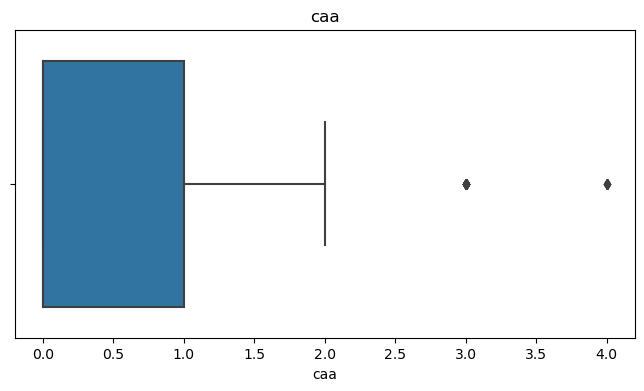

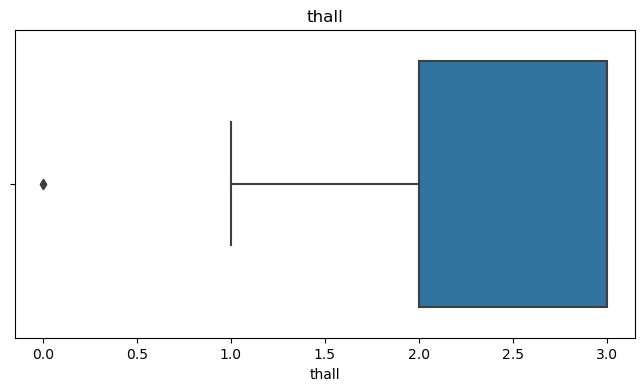

In [ ]:
selected_columns = ["age","trtbps", "chol", "thalachh", "oldpeak", "slp", "caa", "thall"]


for column in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

### Daten bereinigen und vorbereiten

In [ ]:
#Bibliotheken
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Zielvariable definieren
X = df.drop("output", axis=1)
y = df["output"]

In [ ]:
# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aufteilung in Trainings- und Testdaten
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Ausgabe der Dimensionen der Trainings- und Testdaten
print("Trainingsdaten Größe:", X_train_log.shape)
print("Testdaten Größe:", X_test_log.shape)

Trainingsdaten Größe: (242, 13)
Testdaten Größe: (61, 13)


### Erstellen der Logistischen Regression

In [ ]:
#Bibliotheken
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [ ]:
# Erstellen und Trainieren des logistischen Regressionsmodells
model = LogisticRegression()
model.fit(X_train_log, y_train_log)

LogisticRegression()

In [ ]:
# Vorhersagen auf Testdaten
y_pred = model.predict(X_test_log)

In [ ]:
# Bewertung des Modells
accuracy = accuracy_score(y_test_log, y_pred)
print("Genauigkeit:", accuracy)

Genauigkeit: 0.8524590163934426


In [ ]:
conf_matrix = confusion_matrix(y_test_log, y_pred)
print("Konfusionsmatrix:\n", conf_matrix)

Konfusionsmatrix:
 [[25  4]
 [ 5 27]]


In [ ]:
class_report = classification_report(y_test_log, y_pred)
print("Klassifikationsbericht:\n", class_report)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



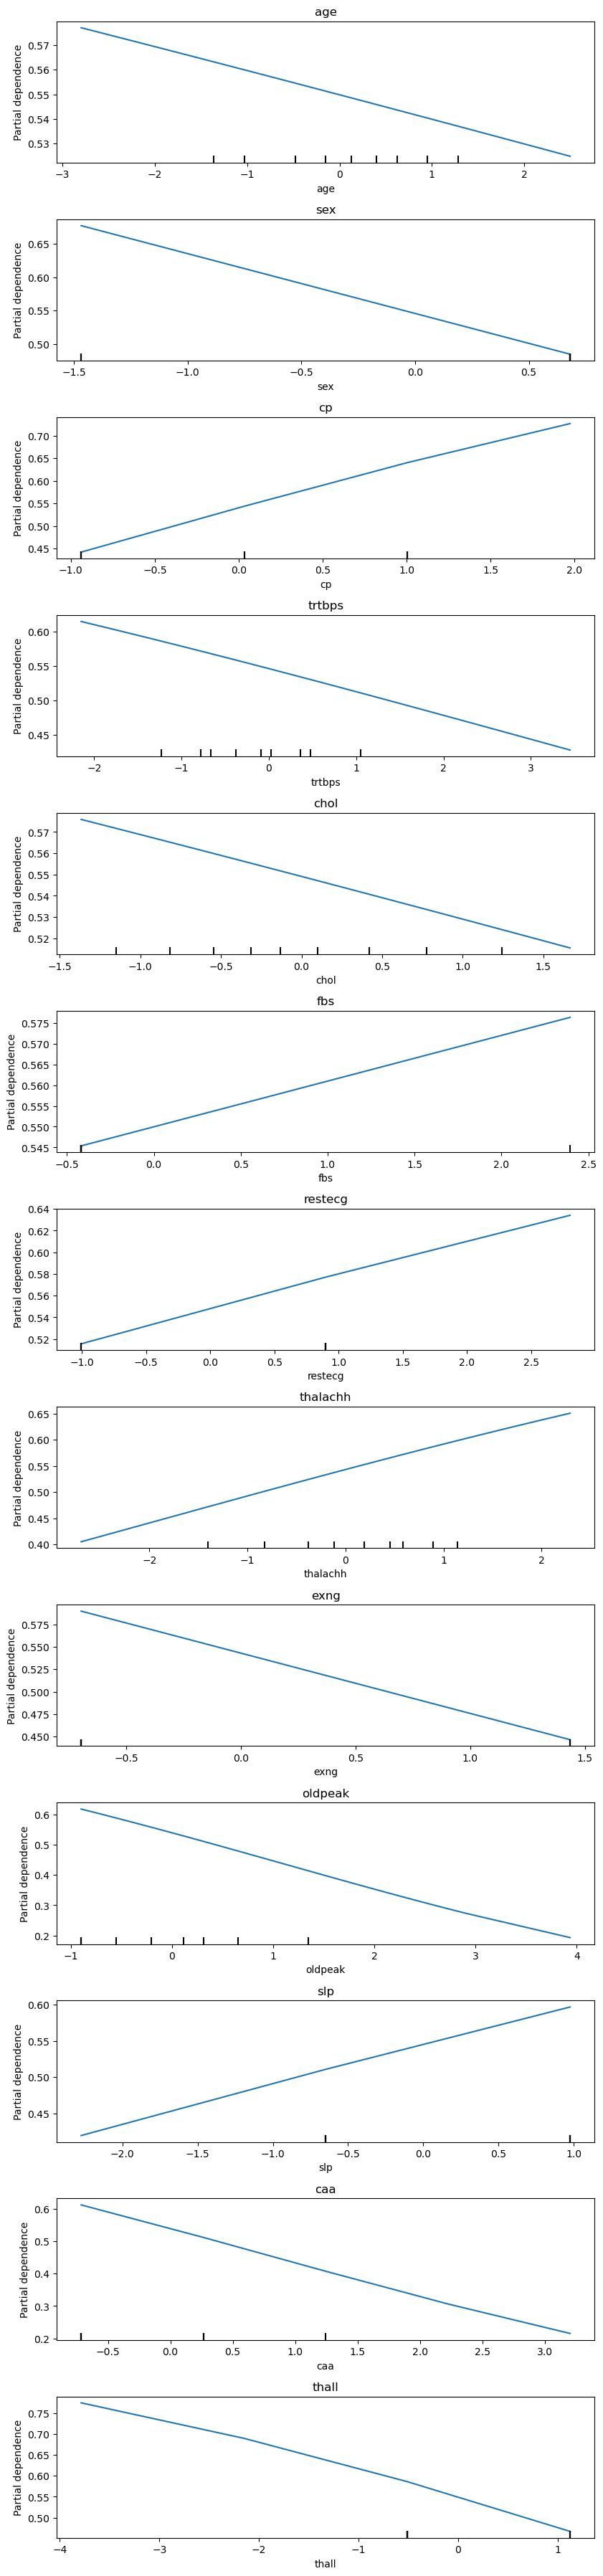

In [ ]:
# Ihre Feature-Namen
feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

# Plot der Partial Dependence Plots
fig_width = 10  # Breite des Plots
fig_height_per_subplot = 3  # Höhe pro Subplot
fig, ax = plt.subplots(len(feature_names), 1, figsize=(fig_width, fig_height_per_subplot * len(feature_names)))

# Erzeugen der Partial Dependence Plots
for i, feature in enumerate(feature_names):
    disp = PartialDependenceDisplay.from_estimator(model, X_train_log, features=[i],
                                                   feature_names=feature_names, ax=ax[i])
    ax[i].set_ylabel('')  # Entfernen der y-Achsen-Beschriftung
    ax[i].set_title(feature)  # Setzen des Feature-Namens als Titel

# Anpassung des Layouts
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.4, wspace=0.2)

plt.show()

# Random Forest

### Bibs

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Daten aufteilen

In [ ]:
# Aufteilung in Trainings- und Testdaten
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

### Erstellen des Random Forest

In [ ]:
model_rf = RandomForestClassifier(max_depth=3, random_state=10)

In [ ]:
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, random_state=10)

In [ ]:
y_pred_rf = model_rf.predict(X_test_rf)

In [ ]:
accuracy_score(y_pred_rf,y_test_rf)

0.8852459016393442

In [ ]:
confusion_matrix(y_pred_rf, y_test_rf)

array([[25,  3],
       [ 4, 29]])

In [ ]:
class_report = classification_report(y_test_rf, y_pred_rf)
print("Klassifikationsbericht:\n", class_report)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



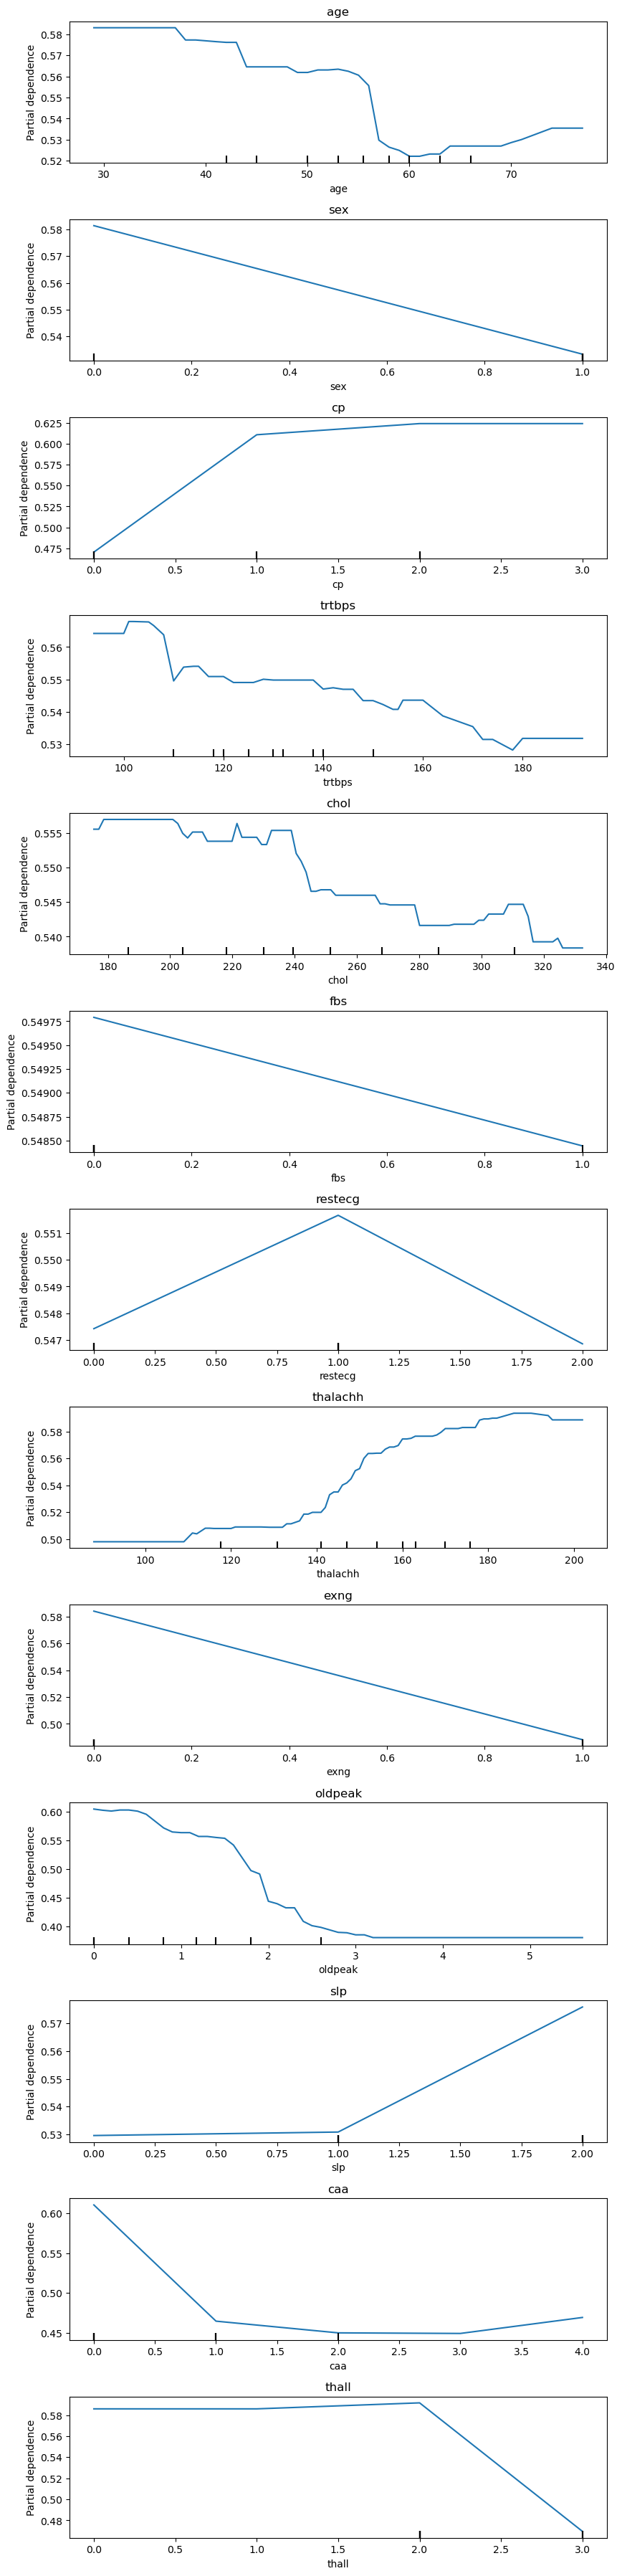

In [ ]:
# Ihre Feature-Namen
feature_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

# Plot der Partial Dependence Plots
fig_width = 10  # Breite des Plots
fig_height_per_subplot = 3  # Höhe pro Subplot
fig, ax = plt.subplots(len(feature_names), 1, figsize=(fig_width, fig_height_per_subplot * len(feature_names)))

# Erzeugen der Partial Dependence Plots
for i, feature in enumerate(feature_names):
    disp = PartialDependenceDisplay.from_estimator(model_rf, X_train_rf, features=[i],
                                                   feature_names=feature_names, ax=ax[i])
    ax[i].set_ylabel('')  # Entfernen der y-Achsen-Beschriftung
    ax[i].set_title(feature)  # Setzen des Feature-Namens als Titel

# Anpassung des Layouts
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.4, wspace=0.2)

plt.show()